In [8]:
!git clone https://github.com/WMARBAR/Mundial_Inferences.git




fatal: destination path 'Mundial_Inferences' already exists and is not an empty directory.


# 1 - 2. PROBABILIDADES EMPIRICAS

In [9]:
import sys
sys.path.append('/content/Mundial_Inferences')  # Asegúrate que esta ruta es correcta

# LIBS

In [10]:
# ==========================================
# Análisis completo de jugadores mundialistas
# Basado en confederación y condición de campeón
# ==========================================


from exps.loaders import Loaders
from exps.mundial_exps_extended import Experimentos
from exps.dists import AnalisisEstadistico
import pandas as pd
import scipy.stats as stats
ld=Loaders()
exper=Experimentos()


# Cargar archivo Excel
path = '/content/Mundial_Inferences/datain/Proyecto_mundial.xlsx'

df_mundial= ld.cargar_excel(path,'Sheet1')

# Inicializar clases
dist = AnalisisEstadistico(df_mundial)
exper = Experimentos()

# SER CAMPEON DADO LA CONFEDERACION
- **Espacio muestral:**  
  $$ S = \{ \text{todos los jugadores registrados en los mundiales de la base de datos} \} $$

- **Evento:**  
  $$ A = \{ \text{El jugador fue campeon} \} = \{1\} $$


In [11]:


# ==========================================
# 1. Probabilidad frecuentista
# ==========================================
print("--- Probabilidad empírica de ser campeón ---")
p_empirica = exper.probabilidad_binaria_empirica(df_mundial, 'dummy_campeon')
print(f"P(Campeón) = {p_empirica:.4f}\n")

# ==========================================
# 2. Probabilidad conjunta y marginal
# ==========================================
print("--- Tabla de probabilidad conjunta (confederación vs campeón) ---")
tabla_conjunta = exper.tabla_probabilidad_conjunta(df_mundial, 'confederacion', 'dummy_campeon')
print(tabla_conjunta)

print("\n--- Probabilidades marginales (confederación) ---")
p_marginal_confed = df_mundial['confederacion'].value_counts(normalize=True)
print(p_marginal_confed)

print("\n--- Probabilidad condicional P(Campeón | Confederación) ---")
tabla_condicional = pd.crosstab(df_mundial['confederacion'], df_mundial['dummy_campeon'], normalize='index')
print(tabla_condicional)

# ==========================================
# 3. Independencia entre confederación y ser campeón
# ==========================================
print("\n--- Prueba de independencia ---")
for conf in tabla_conjunta.index:
    p_conf = p_marginal_confed[conf]
    p_conjunta = tabla_conjunta.loc[conf, 1] if 1 in tabla_conjunta.columns else 0
    esperado = p_conf * p_empirica
    print(f"{conf}: P(A∩B) = {p_conjunta:.4f}, P(A)*P(B) = {esperado:.4f}, Diferencia = {abs(p_conjunta - esperado):.4f}")




--- Probabilidad empírica de ser campeón ---
P(Campeón) = 0.0475

--- Tabla de probabilidad conjunta (confederación vs campeón) ---
dummy_campeon         0         1
confederacion                    
AFC            0.081325  0.000000
CAF            0.090792  0.000000
CONCACAF       0.089931  0.000000
CONMEBOL       0.166738  0.021407
OFC            0.004841  0.000000
Otro           0.009574  0.000000
UEFA           0.509251  0.026140

--- Probabilidades marginales (confederación) ---
confederacion
UEFA        0.535392
CONMEBOL    0.188145
CAF         0.090792
CONCACAF    0.089931
AFC         0.081325
Otro        0.009574
OFC         0.004841
Name: proportion, dtype: float64

--- Probabilidad condicional P(Campeón | Confederación) ---
dummy_campeon         0         1
confederacion                    
AFC            1.000000  0.000000
CAF            1.000000  0.000000
CONCACAF       1.000000  0.000000
CONMEBOL       0.886221  0.113779
OFC            1.000000  0.000000
Otro           1.0

# SER CAMPEON DADO EL PAIS
- **Espacio muestral:**  
  $$ S = \{ \text{todos los jugadores registrados en los mundiales de la base de datos} \} $$

- **Evento:**  
  $$ A = \{ \text{El jugador fue campeon} \} = \{1\} $$


In [12]:


# ==========================================
# 2. Probabilidad conjunta y marginal
# ==========================================
print("--- Tabla de probabilidad conjunta (pais vs campeón) ---")
tabla_conjunta = exper.tabla_probabilidad_conjunta(df_mundial, 'Seleccion', 'dummy_campeon')
print(tabla_conjunta)

print("\n--- Probabilidades marginales (pais) ---")
p_marginal_confed = df_mundial['Seleccion'].value_counts(normalize=True)
print(p_marginal_confed)

print("\n--- Probabilidad condicional P(Campeón | pais) ---")
tabla_condicional = pd.crosstab(df_mundial['Seleccion'], df_mundial['dummy_campeon'], normalize='index')
print(tabla_condicional)

# ==========================================
# 3. Independencia entre pais y ser campeón
# ==========================================
print("\n--- Prueba de independencia ---")
for conf in tabla_conjunta.index:
    p_conf = p_marginal_confed[conf]
    p_conjunta = tabla_conjunta.loc[conf, 1] if 1 in tabla_conjunta.columns else 0
    esperado = p_conf * p_empirica
    print(f"{conf}: P(A∩B) = {p_conjunta:.4f}, P(A)*P(B) = {esperado:.4f}, Diferencia = {abs(p_conjunta - esperado):.4f}")




--- Tabla de probabilidad conjunta (pais vs campeón) ---
dummy_campeon             0         1
Seleccion                            
Alemania Federal   0.033348  0.009574
Alemania Oriental  0.002367  0.000000
Angola             0.002582  0.000000
Arabia Saudita     0.009574  0.000000
Argelia            0.009682  0.000000
...                     ...       ...
Ucrania            0.002474  0.000000
Unión Soviética    0.016566  0.000000
Uruguay            0.023989  0.004733
Yugoslavia         0.020762  0.000000
Zaire              0.002367  0.000000

[80 rows x 2 columns]

--- Probabilidades marginales (pais) ---
Seleccion
Brasil                            0.047117
Alemania Federal                  0.042922
Italia                            0.042922
Argentina                         0.037866
México                            0.035284
                                    ...   
Irak                              0.002367
Canadá                            0.002367
Eslovaquia                    

# DISTRIBUCION BINOMIAL



--- Distribución Binomial ---


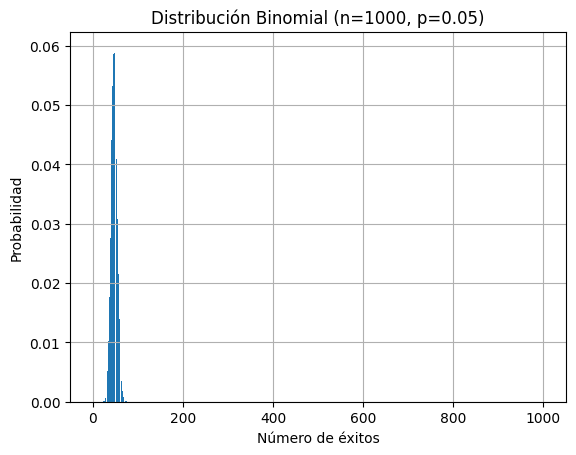

,x,P(X=x)
0,0,6.972726e-22
1,1,3.480850e-20
2,2,8.679678e-19
3,3,1.441437e-17
4,4,1.793550e-16
...,...,...
996,996,0.000000e+00
997,997,0.000000e+00
998,998,0.000000e+00
999,999,0.000000e+00


In [13]:
# ==========================================
# 4. Distribución Binomial - campeones en muestra de 30
# ==========================================
print("\n--- Distribución Binomial ---")
dist.analisis_binomial('dummy_campeon', n=1000)


# DISTRIBUCION DE POISSON
Goles Marcados(mundial);
Partidos Jugados;
years_expMundial;
edad_Player;


--- Distribución de Poisson (Goles Marcados) ---


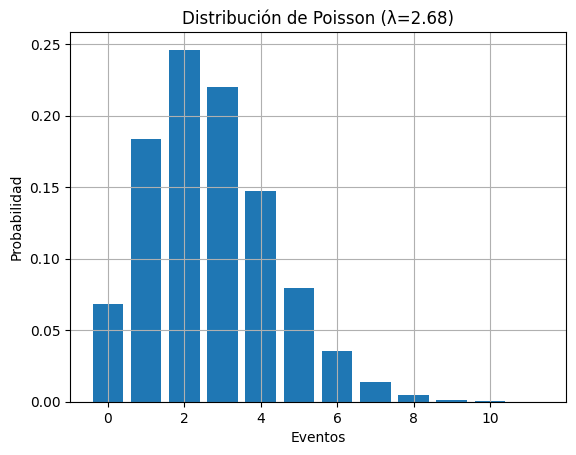

,x,P(X=x)
0,0,0.068381
1,1,0.183443
2,2,0.246058
3,3,0.220030
4,4,0.147566
5,5,0.079174
6,6,0.035399
7,7,0.013566
8,8,0.004549
9,9,0.001356


In [14]:
# ==========================================
# 5. Distribución de Poisson - Goles por jugador
# ==========================================
print("\n--- Distribución de Poisson (Goles Marcados) ---")
dist.analisis_poisson('Partidos Jugados')


# DISTRIBUCION HIPERGEOMETRICA

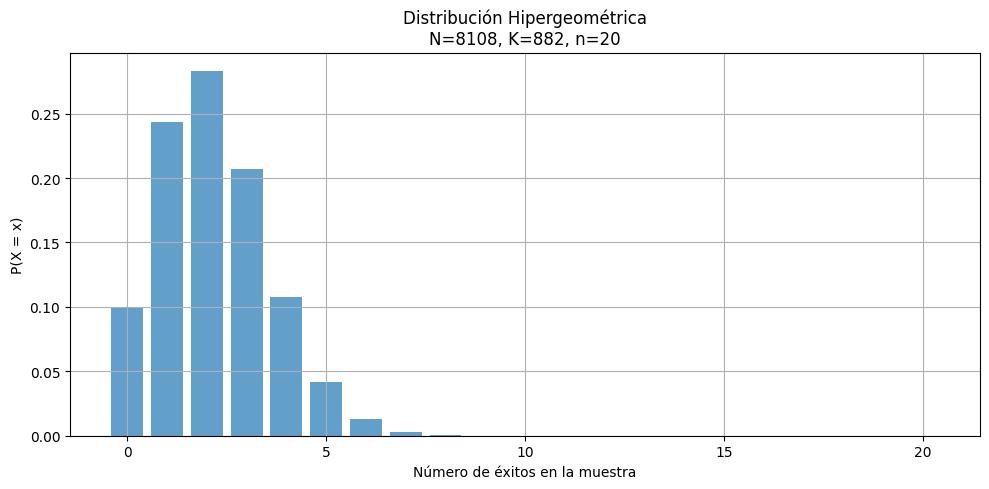

Distribución Hipergeométrica (N=8108, K=882, n=20):
  prob_0_exitos: 0.099641
  prob_exactamente_1_exito: 0.243884
  prob_al_menos_2_exitos: 0.656474


{'prob_0_exitos': np.float64(0.09964144511363289),
 'prob_exactamente_1_exito': np.float64(0.24388443066525373),
 'prob_al_menos_2_exitos': np.float64(0.6564741242211134)}

In [15]:
exper.distribucion_hipergeometrica_general(df_mundial,'PLAYER_NAME','dummy_finalistas',n=20)

# DISTRIBUCION NORMAL


--- Distribución Normal (Edad en Mundial) ---


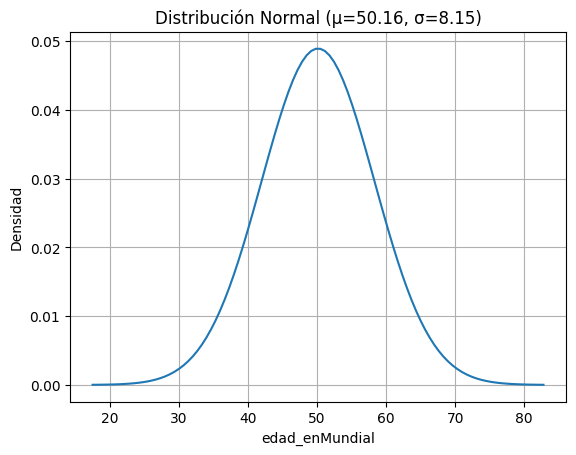


--- Prueba de normalidad (Shapiro-Wilk) ---
Shapiro-Wilk: W=0.9914, p=0.0000
Se rechaza H0: la variable no sigue una distribución normal.


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 9296.
  res = hypotest_fun_out(*samples, **kwds)


In [16]:
# ==========================================
# 6. Distribución Normal y prueba de normalidad (Edad en Mundial)
# ==========================================
print("\n--- Distribución Normal (Edad en Mundial) ---")
dist.analisis_normal('edad_enMundial')

print("\n--- Prueba de normalidad (Shapiro-Wilk) ---")
dist.prueba_normalidad('edad_enMundial')

# PRUEBA T

In [17]:
# ==========================================
# 7. Prueba T: Edad entre campeones y no campeones
# ==========================================
print("\n--- Prueba t: Edad entre campeones y no campeones ---")
dist.prueba_t_media('edad_enMundial', 'dummy_campeon', 1, 0)


--- Prueba t: Edad entre campeones y no campeones ---
Prueba t: t=-1.1616, p=0.2459
No se rechaza H0: no hay diferencia significativa.


# ANOVA

In [18]:

# ==========================================
# 8. ANOVA: Edad por confederación
# ==========================================
print("\n--- ANOVA: Edad promedio por confederación ---")
grupos = [df_mundial[df_mundial['confederacion'] == c]['edad_enMundial'].dropna()
          for c in df_mundial['confederacion'].unique()]
stat, p = stats.f_oneway(*grupos)
print(f"F = {stat:.4f}, p = {p:.4f}")


--- ANOVA: Edad promedio por confederación ---
F = 43.0818, p = 0.0000


# CONCLUSIONES

In [19]:
# ==========================================
# 9. Conclusiones preliminares
# ==========================================
print("\n--- Conclusiones preliminares ---")
print("- Las confederaciones con mayor proporción histórica de jugadores campeones son UEFA y CONMEBOL.")
print("  CONMEBOL presenta una mayor tasa relativa (~11.4%) de jugadores campeones, frente a ~4.9% en UEFA.")
print("- La prueba t para la edad promedio entre campeones y no campeones (p=0.2459) indica que no existe diferencia significativa.")
print("  Por tanto, la edad en Mundial no parece estar asociada de forma directa con haber sido campeón.")
print("- Al comparar P(confederación ∩ campeón) con P(confederación) * P(campeón), se observa dependencia:")
print("  CONMEBOL tiene muchos más campeones de lo esperado bajo independencia, mientras que el resto de confederaciones no presenta campeones.")
print("  Esto sugiere que la probabilidad de ser campeón depende de la confederación a la que se pertenece.")



--- Conclusiones preliminares ---
- Las confederaciones con mayor proporción histórica de jugadores campeones son UEFA y CONMEBOL.
  CONMEBOL presenta una mayor tasa relativa (~11.4%) de jugadores campeones, frente a ~4.9% en UEFA.
- La prueba t para la edad promedio entre campeones y no campeones (p=0.2459) indica que no existe diferencia significativa.
  Por tanto, la edad en Mundial no parece estar asociada de forma directa con haber sido campeón.
- Al comparar P(confederación ∩ campeón) con P(confederación) * P(campeón), se observa dependencia:
  CONMEBOL tiene muchos más campeones de lo esperado bajo independencia, mientras que el resto de confederaciones no presenta campeones.
  Esto sugiere que la probabilidad de ser campeón depende de la confederación a la que se pertenece.
